# Notebook for Clustering & Topic Analysis

The notebook contains codes to cluster the data set (**html_metadata.csv**) we collected from the website __[Home Sweet Home](https://www.ehow.com/home-sweet-home)__ for topic analysis.

The notebook consists of 3 main sections:

1. [Parepare the data set](#section_1)
2. [K-means clustering](#section_2)
> - [2.1 Fit the model](#section_2.1)
> - [2.2 Evaluate model performance](#section_2.2)
3. [LDA topic modeling](#section_3)
> - [3.1 Fit the model](#section_3.1)
> - [3.2 Model evaluation and visualizaiton](#section_3.2) 

In summary, the K-Means model found 6 clusters that could be differentiated by keyword analysis; the LDA model generated 3 topics for the data set. 


## <a id="section_1">1. Prepare the data set</a>

We loaded the **html_metadata.csv** file in the **outcome** folder that stores the information of all articles downloaded from the website as a pandas dataframe. 

The dataframe contains the file name, article title, article date, author, and body text of each article. 

In [1]:
import pandas as pd

# load the data set of html data
df = pd.read_csv("outcome/html_metadata.csv", sep="\t")
df

,file_name,article_title,article_date,article_author,body_text
0,identifying-types-peas.html,Identifying Types of Peas,NaN,Tara Cochrane,"Peas, in and out of the pod The pea plant ..."
1,troubleshoot-intertherm-furnace-blower-stays.html,How to Troubleshoot an Intertherm Furnace Blow...,NaN,Dylan Kennedy,Intertherm blowers may not shut off if they ar...
2,_before-after-metal-cart-becomes-side-table.html,Before & After: Metal Cart Becomes a Side Table,NaN,Jessica Begum,Things You'll Need 3 cans of colorful outdoo...
3,replace-thermocouple-trane-furnace.html,How to Replace the Thermocouple on a Trane Fur...,NaN,Damon Koch,Things You'll Need Phillips screwdriverTherm...
4,do-bermuda-grass-south-carolina.html,When Do You Lime Bermuda Grass in South Carolina?,NaN,Angela Ryczkowski,Bermuda grass is a popular turf species throug...
...,...,...,...,...,...
8959,test-oil-pressure-switch-generator.html,How to Test the Low Oil Pressure Switch on a G...,NaN,Yvonne Grant,Gasoline generators create an A/C current to c...
8960,_required-drop-toilet-drains.html,Required Drop Toilet Drains,NaN,Glenda Taylor,Correct drain drop reduces clogs. Image Cred...
8961,_minimum-distance-toilet-bowl-toilet-paper-hol...,Minimum Distance From Toilet Bowl to Toilet Pa...,NaN,Naima Manal,Check the correct spacing of the toilet tissue...
8962,late-seed-lawn-northeast.html,When Is It Too Late to Seed Your Lawn in the N...,NaN,Jacob J. Wright,Use fresh grass seed on the lawn to ensure bes...


We then would like to remove rows in which the `body_text` is empty. 

In [2]:
# Check the missing values in the sentence values of the data set
for i in df["body_text"]:
    if pd.isna(i):
        print(i)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [3]:
# Clean the nan values from the data set
miss_list = list()
for i in range(len(df)):
    if pd.isna(df["body_text"][i]):
        miss_list.append(i)
# print(miss_list)       
 
    
df = df.drop(df.index[miss_list])
df.shape

(7993, 5)

Then we prepared the data set for modelling.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# prepare data for modelling
vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words="english", max_df=0.7)
X = vectorizer.fit_transform(df.body_text)
X

<7993x57207 sparse matrix of type '<class 'numpy.float64'>'
	with 1241949 stored elements in Compressed Sparse Row format>

In [5]:
X.shape

(7993, 57207)

## <a id="section_2">2. K-Means Clusteirng</a>

In this section, we applied K-Menas Clustering to the data set. 

### <a id="section_2.1"> 2.1. Fit the model</a> 

We checked the number of article categories on the website __[Home Sweet Home](https://www.ehow.com/home-sweet-home)__.

It seems there are six major cateogires:
- Hacks, Tips, and Tricks
- Squeaky Clean
- DIY Decor
- Carpentry and Remodeling
- Maintenance and Repair
- Green Thumb

Therefore, we chose the number of clusters to be six to initialize a K-Means Clustering model.


In [6]:
# Choose the number of cluster 
k = 6 # there are 6 categories on the website

In [7]:
from sklearn.cluster import KMeans

# Initialize the Kmeans model with 6 clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans

KMeans(n_clusters=6, random_state=0)

We then fit the model to the data set.

In [8]:
# fit the model on the input data
%time kmeans.fit(X)

CPU times: user 1min 22s, sys: 544 ms, total: 1min 22s
Wall time: 10.9 s


KMeans(n_clusters=6, random_state=0)

We added a column of `label` in the data frame to show the predicted label of each article by the K-Means Clustering model.

In [9]:
df["label"] = kmeans.predict(X)
df

,file_name,article_title,article_date,article_author,body_text,label
0,identifying-types-peas.html,Identifying Types of Peas,NaN,Tara Cochrane,"Peas, in and out of the pod The pea plant ...",2
1,troubleshoot-intertherm-furnace-blower-stays.html,How to Troubleshoot an Intertherm Furnace Blow...,NaN,Dylan Kennedy,Intertherm blowers may not shut off if they ar...,1
2,_before-after-metal-cart-becomes-side-table.html,Before & After: Metal Cart Becomes a Side Table,NaN,Jessica Begum,Things You'll Need 3 cans of colorful outdoo...,5
3,replace-thermocouple-trane-furnace.html,How to Replace the Thermocouple on a Trane Fur...,NaN,Damon Koch,Things You'll Need Phillips screwdriverTherm...,1
4,do-bermuda-grass-south-carolina.html,When Do You Lime Bermuda Grass in South Carolina?,NaN,Angela Ryczkowski,Bermuda grass is a popular turf species throug...,2
...,...,...,...,...,...,...
8959,test-oil-pressure-switch-generator.html,How to Test the Low Oil Pressure Switch on a G...,NaN,Yvonne Grant,Gasoline generators create an A/C current to c...,1
8960,_required-drop-toilet-drains.html,Required Drop Toilet Drains,NaN,Glenda Taylor,Correct drain drop reduces clogs. Image Cred...,3
8961,_minimum-distance-toilet-bowl-toilet-paper-hol...,Minimum Distance From Toilet Bowl to Toilet Pa...,NaN,Naima Manal,Check the correct spacing of the toilet tissue...,3
8962,late-seed-lawn-northeast.html,When Is It Too Late to Seed Your Lawn in the N...,NaN,Jacob J. Wright,Use fresh grass seed on the lawn to ensure bes...,2


In [10]:
# Check the number of items in each cluster
df.label.value_counts()

1    3081
2    1584
4    1395
0    1022
3     596
5     315
Name: label, dtype: int64

As a result, it shows that the largest cluster contains 3081 articles, and the smallest cluster contains 315 articles.

### <a id="section_2.2"> 2.2. Evaluate the performance of the model</a>

In this section we evaluated the performance of the model with the selected 6 clusters by checking the top-50 most frequent words in each data set, and comparing them with the categories givin by the website. 

In [11]:
# get the labels of clusters sorted by size
cluster_1st, cluster_2nd, cluster_3rd, cluster_4th, cluster_5th, cluster_6th = df.label.value_counts().index
cluster_1st, cluster_2nd, cluster_3rd, cluster_4th, cluster_5th, cluster_6th

(1, 2, 4, 0, 3, 5)

We first defined the fouction of counting common words. 

We used the English stopwords package as the global stopwords, and included punctuations, auxiliary words as local stopwords.

Considering the nature of the website as providing home improvement suggestions, we also included words such as *home, best, want, make, use* that frequently appear in all articles and can't provide much information regarding article topics in the local stopwords.

In [12]:
import nltk
from collections import Counter
# tokenize body text of each article into words
df["words"] = df.body_text.apply(lambda x: nltk.word_tokenize(x))
# tag the words in the word list
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))


# define the get_counter function
def get_counter(dataframe, stopwords=[]):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set() # count the same word once for one article

        for t in l:
            word = t[0].lower() # convert all words into lower case
            tag = t[1]

            # count the word if it is not a stopword
            if word not in stopwords: 
                word_set.add(word)
            
        counter.update(word_set)
        
    return counter

from nltk.corpus import stopwords
import string

# define global stopwords
global_stopwords = stopwords.words("english") 
# define local stopwords
local_stopwords = [c for c in string.punctuation] +\
                  ['‘', '’', '“', '”', '``', '…', '...', "''", "'m", "'re", "'s", "'ve", "n't", 
                   'amp', 'http', 'https', 'rt',
                   'things', "you'll", 'need', 'Image', "image", "do", "Video", "video", "day",
                  "by", "By", "advertisement", "1", "2", "3", "4", "5", "6", "7", "8", "9", "0",
                  "'ll", "also", "get", "may", "sweet", "one", "two", "around", "related", "stories",
                  "like", "small", "many", "home", "use", "step", "way", "first", "make", "even",
                  "credit", "using", "well", "time", "best", "want", "sure", "end", "without",
                  "much", "away", "however", "enough", "allow", "take", "help", "often", "put",
                  "top", "back", "side", "work", "made", "find", "turn", "10", "three", "look",
                  "another", "other", "come", "coming", "several", "some", "right", "left", "making"]

#### First cluster (the largest)

Check the top-50 most common keywords in the largest cluster.

In [13]:
counter_1 = get_counter(df[df.label == cluster_1st], global_stopwords+local_stopwords)
counter_1.most_common(50)

[('place', 1462),
 ('remove', 1289),
 ('used', 1112),
 ('keep', 1009),
 ('water', 884),
 ('new', 830),
 ('clean', 774),
 ('inside', 762),
 ('set', 757),
 ('cut', 744),
 ('add', 743),
 ('crafty', 728),
 ('area', 713),
 ('large', 705),
 ('air', 662),
 ('inches', 651),
 ('long', 649),
 ('surface', 640),
 ('different', 639),
 ('hold', 632),
 ('create', 628),
 ('light', 627),
 ('prevent', 604),
 ('bottom', 603),
 ('pull', 602),
 ('wood', 601),
 ('cover', 595),
 ('metal', 583),
 ('dry', 583),
 ('size', 583),
 ('open', 577),
 ('easy', 577),
 ('check', 577),
 ('room', 568),
 ('replace', 566),
 ('space', 561),
 ('good', 533),
 ('piece', 523),
 ('install', 521),
 ('color', 518),
 ('let', 518),
 ('wire', 516),
 ('power', 514),
 ('must', 510),
 ('available', 494),
 ('house', 493),
 ('hand', 493),
 ('plastic', 493),
 ('onto', 490),
 ('go', 488)]

Check 10 random texts from the second largest cluster. (Replace the cluster number as needed.)

In [14]:
# Visualize the keywords with wordcloud 

from IPython.display import Image
from wordcloud import WordCloud

def plot_wordcloud(counter, image_file_name, max_words = 100):
    wc = WordCloud(background_color = "white", max_words = max_words, width = 800, height = 500)
    wc.generate_from_frequencies(counter)
    wc.to_file(image_file_name)
    display(Image(filename = image_file_name))

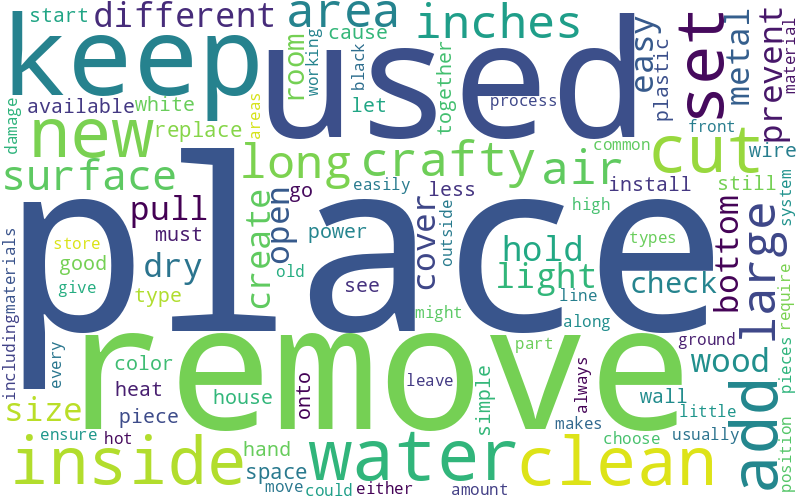

In [15]:
plot_wordcloud(counter_1, "outcome/knn_1st_cluster.png", 100)

It is a little bit hard to tell what the largest cluster is about. It seems is about crafting works at home, such as tips about general home improvement works, or DIY decorations. 

#### Second largest cluster

Check the top-50 most common keywords in the second largest cluster.

In [16]:
counter_2 = get_counter(df[df.label == cluster_2nd], global_stopwords+local_stopwords)
counter_2.most_common(50)

[('plant', 1268),
 ('plants', 1117),
 ('grow', 1063),
 ('soil', 1031),
 ('water', 974),
 ('leaves', 903),
 ('growing', 803),
 ('growth', 712),
 ('garden', 691),
 ('keep', 645),
 ('trees', 645),
 ('tree', 638),
 ('flowers', 612),
 ('roots', 594),
 ('spring', 587),
 ('inches', 580),
 ('new', 566),
 ('green', 555),
 ('long', 552),
 ('feet', 542),
 ('dry', 539),
 ('fall', 531),
 ('large', 511),
 ('white', 492),
 ('remove', 484),
 ('species', 477),
 ('used', 471),
 ('ground', 469),
 ('zones', 468),
 ('winter', 464),
 ('summer', 462),
 ('planting', 452),
 ('grows', 448),
 ('root', 445),
 ('care', 444),
 ('yellow', 444),
 ('early', 443),
 ('area', 441),
 ('sun', 441),
 ('produce', 439),
 ('conditions', 434),
 ('foliage', 434),
 ('areas', 424),
 ('hardiness', 422),
 ('cause', 421),
 ('types', 418),
 ('prevent', 410),
 ('place', 409),
 ('cut', 406),
 ('good', 398)]

Visualize the keywords of the second cluster

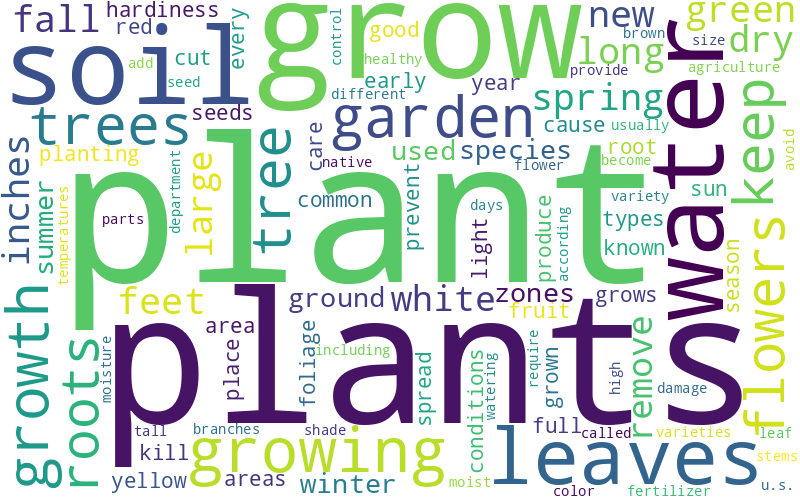

In [17]:
plot_wordcloud(counter_2, "outcome/knn_2nd_cluster.png", 100)

It is pretty obvious that the second largest cluster is about plants and gardening. 

#### The third largest cluster

Check the top-50 most common keywords in the third largest cluster.

In [18]:
counter_3 = get_counter(df[df.label == cluster_3rd], global_stopwords+local_stopwords)
counter_3.most_common(50)

[('place', 874),
 ('cut', 731),
 ('wall', 676),
 ('wood', 658),
 ('install', 649),
 ('remove', 619),
 ('inches', 611),
 ('measure', 589),
 ('surface', 523),
 ('edge', 520),
 ('along', 510),
 ('bottom', 502),
 ('floor', 488),
 ('used', 476),
 ('screws', 463),
 ('mark', 461),
 ('hold', 460),
 ('piece', 438),
 ('length', 438),
 ('tape', 427),
 ('set', 426),
 ('walls', 403),
 ('area', 401),
 ('holes', 398),
 ('add', 397),
 ('line', 397),
 ('inch', 396),
 ('edges', 390),
 ('space', 390),
 ('fit', 388),
 ('drill', 387),
 ('screw', 376),
 ('attach', 369),
 ('pieces', 368),
 ('saw', 364),
 ('center', 360),
 ('dry', 358),
 ('new', 358),
 ('level', 358),
 ('size', 355),
 ('apply', 355),
 ('long', 355),
 ('create', 344),
 ('hole', 335),
 ('concrete', 335),
 ('images', 332),
 ('board', 330),
 ('water', 329),
 ('sides', 328),
 ('inside', 318)]

Visualize the keywords of the third cluster

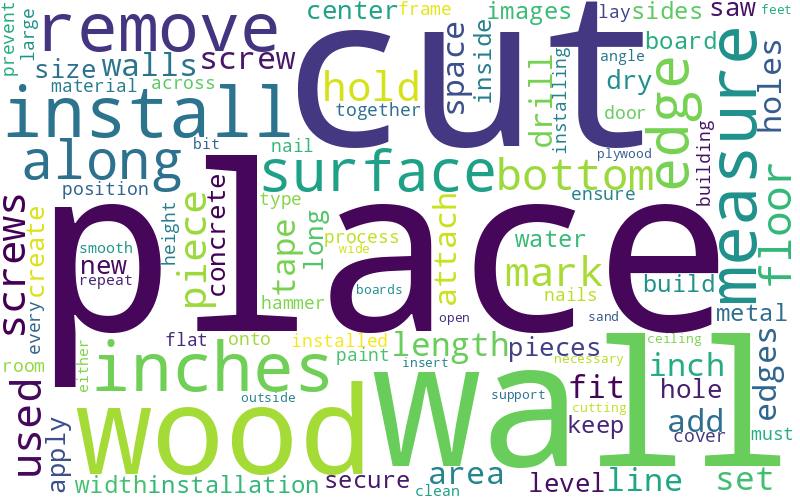

In [19]:
plot_wordcloud(counter_3, "outcome/knn_3rd_cluster.png", 100)

It seems like the third cluster is about carpentry or crafty work with wood or wall. 

#### The fourth cluster

Check the top-50 most common keywords in the fourth cluster.

In [20]:
counter_4 = get_counter(df[df.label == cluster_4th], global_stopwords+local_stopwords)
counter_4.most_common(50)

[('remove', 871),
 ('water', 870),
 ('clean', 870),
 ('dry', 661),
 ('cleaning', 622),
 ('stains', 504),
 ('rinse', 466),
 ('white', 442),
 ('vinegar', 429),
 ('cloth', 424),
 ('surface', 419),
 ('wipe', 412),
 ('solution', 410),
 ('area', 394),
 ('minutes', 389),
 ('keep', 388),
 ('add', 377),
 ('let', 373),
 ('scrub', 370),
 ('wash', 353),
 ('place', 346),
 ('soap', 346),
 ('spray', 340),
 ('stain', 339),
 ('cleaner', 329),
 ('cup', 329),
 ('used', 318),
 ('warm', 315),
 ('mix', 304),
 ('brush', 304),
 ('detergent', 300),
 ('liquid', 296),
 ('apply', 293),
 ('pour', 292),
 ('soda', 289),
 ('bleach', 281),
 ('baking', 272),
 ('leave', 270),
 ('prevent', 267),
 ('onto', 265),
 ('fill', 263),
 ('products', 261),
 ('sponge', 261),
 ('dirt', 259),
 ('rub', 258),
 ('soft', 255),
 ('washing', 255),
 ('damage', 253),
 ('soak', 253),
 ('surfaces', 244)]

Visualize the keywords of the third cluster

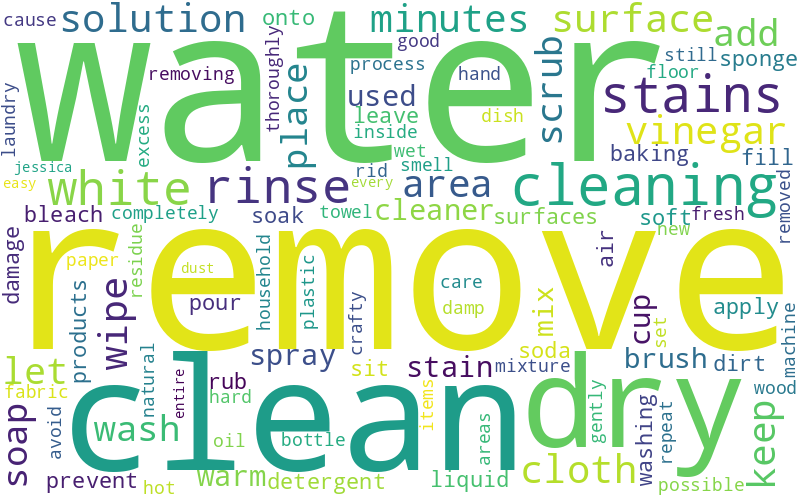

In [21]:
plot_wordcloud(counter_4, "outcome/knn_4th_cluster.png", 100)

The fourth cluster should be about cleaning.

#### The fifth cluster

Check the top-50 most common keywords in the fifth cluster.

In [22]:
counter_5 = get_counter(df[df.label == cluster_5th], global_stopwords+local_stopwords)
counter_5.most_common(50)

[('water', 499),
 ('remove', 350),
 ('pipe', 296),
 ('place', 274),
 ('drain', 272),
 ('pipes', 228),
 ('inside', 212),
 ('replace', 210),
 ('clean', 208),
 ('valve', 203),
 ('install', 192),
 ('plumbing', 189),
 ('line', 184),
 ('system', 181),
 ('used', 170),
 ('supply', 169),
 ('repair', 168),
 ('new', 166),
 ('tank', 165),
 ('flow', 152),
 ('toilet', 150),
 ('bottom', 149),
 ('check', 146),
 ('pull', 145),
 ('must', 143),
 ('keep', 142),
 ('pool', 142),
 ('cause', 141),
 ('level', 140),
 ('pressure', 135),
 ('plastic', 132),
 ('prevent', 130),
 ('wrench', 128),
 ('faucet', 127),
 ('handle', 127),
 ('onto', 126),
 ('pump', 126),
 ('hose', 126),
 ('run', 125),
 ('cut', 124),
 ('outside', 124),
 ('screw', 124),
 ('properly', 123),
 ('connect', 123),
 ('tighten', 122),
 ('open', 121),
 ('area', 120),
 ('set', 120),
 ('main', 119),
 ('located', 118)]

Visualize the keywords in the fifth cluster

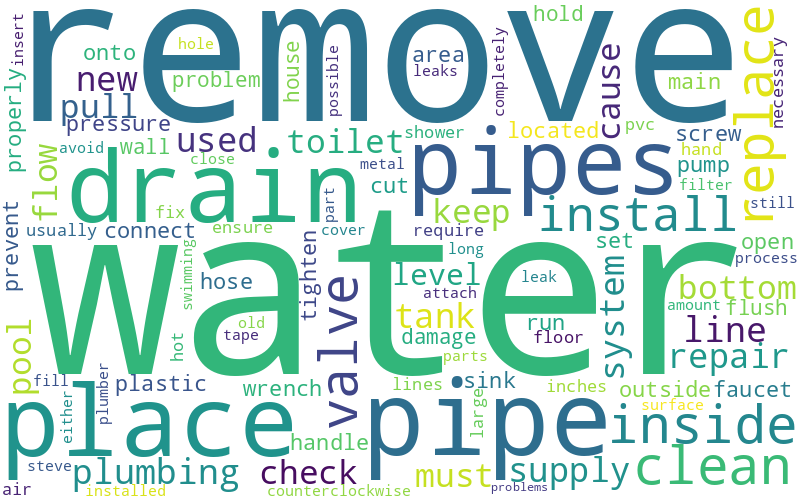

In [23]:
plot_wordcloud(counter_5, "outcome/knn_5th_cluster.png", 100)

It seems the fifth cluster is about plumbing, or maintenance work needed for the kitchen sink and toilet.

#### The sixth cluster (the smallest)

Check the top-50 most common keywords in the smallest cluster.

In [24]:
counter_6 = get_counter(df[df.label == cluster_6th], global_stopwords+local_stopwords)
counter_6.most_common(50)

[('paint', 312),
 ('dry', 251),
 ('remove', 224),
 ('apply', 214),
 ('surface', 211),
 ('crafty', 193),
 ('coat', 192),
 ('painting', 178),
 ('clean', 177),
 ('brush', 155),
 ('water', 152),
 ('finish', 140),
 ('wood', 137),
 ('painted', 135),
 ('sand', 135),
 ('color', 134),
 ('area', 132),
 ('primer', 128),
 ('wipe', 116),
 ('cloth', 115),
 ('used', 112),
 ('completely', 111),
 ('second', 107),
 ('cover', 107),
 ('sandpaper', 104),
 ('add', 104),
 ('onto', 100),
 ('let', 99),
 ('place', 99),
 ('coats', 95),
 ('dust', 95),
 ('create', 95),
 ('hours', 94),
 ('spray', 93),
 ('smooth', 92),
 ('new', 91),
 ('sanding', 90),
 ('roller', 89),
 ('areas', 89),
 ('surfaces', 88),
 ('latex', 87),
 ('protect', 85),
 ('paintbrush', 85),
 ('paints', 84),
 ('applying', 83),
 ('layer', 83),
 ('entire', 82),
 ('tape', 82),
 ('old', 81),
 ('plastic', 81)]

Visualize the keywords in the smallest cluster.

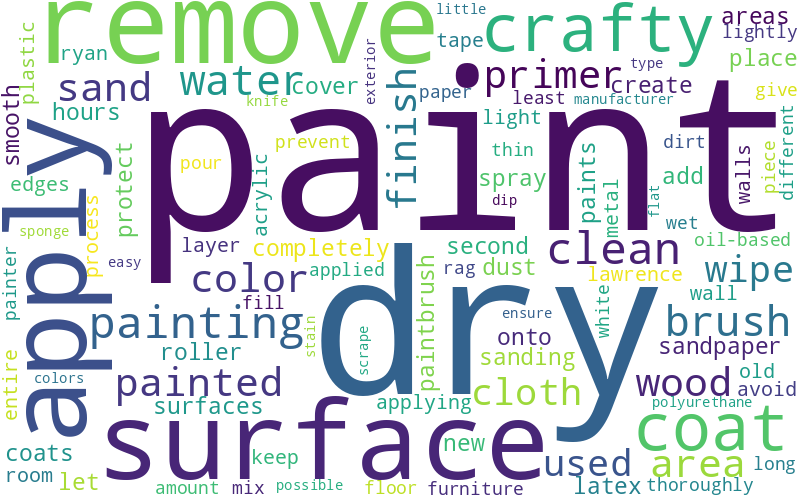

In [25]:
plot_wordcloud(counter_6, "outcome/knn_6th_cluster.png", 100)

It seems that the last cluster is about painting.

We think the K-Means Clustering did a pretty good job in clustering the articles. Although it didn't perfectly align with the categories suggested on the website, and also the largest cluster is a bit hard to tell what the topic its articles all have in common, the model successfully generates five clusters whose keywords can clearly determine the topic of the cluster. 

In summary, the K-Means Clustering model clustered out data set into six clusters. The largest cluster is about general tips for homo improvement, the second largest cluster is about gardenning and plants, the third largest cluster is about carpentry, the fourth largest cluster is about cleaning, the fifth cluster is about plumbing, and the smallest cluster is about painting. 

## <a id="section_3">3.LDA Topic Modeling </a>

In this section, we applied the LDA Topic Model to the data set. 

Again, we chose 6 topics to initialize the model. However, the model generated 6 topics, two of which were hard to differentiate by the keywords as well as in visualization. 

Then we chose 4 topics for modelling, and keywords and visualization showed again that two topics were overlapping. 

Therefore, we finalized the model with 3 topics.


### <a id="section_3.1"> 3.1. Fit the model </a>

In [26]:
# Choose the number of topics
num_topics = 3

In [27]:
# Initialize a model object with initial parameters
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=num_topics, random_state=0)     
lda

LatentDirichletAllocation(n_components=3, random_state=0)

In [28]:
# Fit the model on the input data
%time lda.fit(X)

CPU times: user 18.3 s, sys: 13.3 ms, total: 18.3 s
Wall time: 18.3 s


LatentDirichletAllocation(n_components=3, random_state=0)

### <a id="section_3.2"> 3.2. Model evaluation and visualization </a>

After fitting the model, we can evaluate the model performance by showing the keywords of each topic.

In [29]:
# Get the topic modeling outcome
lda.components_

array([[6.25912382, 8.9451602 , 1.86704124, ..., 0.38466571, 0.35130015,
        0.40035406],
       [0.34537685, 2.22493918, 0.33409297, ..., 0.36342574, 0.38315795,
        0.3337271 ],
       [0.33415644, 0.33475591, 0.33442632, ..., 0.33406479, 0.33420465,
        0.33383368]])

In [30]:
lda.components_.shape

(3, 57207)

Show the keywords of each topic.

In [31]:
# Define the function to show the topic keywords
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print(f"*** Topic {topic_idx}:")
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [32]:
show_topics(lda, vectorizer.get_feature_names_out(), 30)

*** Topic 0:
353.60 * step + 189.42 * water + 134.17 * wood + 129.22 * paint + 129.05 * use + 124.49 * remove + 117.43 * wall + 110.57 * image + 108.55 * credit + 101.12 * clean + 97.46 * make + 95.84 * inch + 94.80 * cut + 93.84 * door + 93.58 * place + 87.84 * floor + 84.34 * dry + 83.45 * using + 82.13 * surface + 81.67 * concrete + 77.02 * air + 76.33 * oil + 75.31 * pipe + 74.67 * inches + 74.12 * wire + 71.48 * stain + 70.43 * area + 67.99 * ll + 66.51 * metal + 66.26 * used

*** Topic 1:
114.09 * plant + 97.23 * plants + 88.08 * tree + 88.07 * soil + 72.34 * trees + 68.09 * leaves + 56.64 * grow + 46.21 * flowers + 41.37 * fruit + 38.16 * seeds + 37.65 * growing + 36.33 * roots + 31.49 * growth + 30.67 * fertilizer + 28.81 * seed + 28.23 * root + 27.81 * zones + 26.64 * garden + 26.19 * species + 24.93 * planting + 24.75 * leaf + 24.41 * green + 24.30 * spring + 24.24 * flower + 23.95 * foliage + 23.23 * branches + 23.19 * yellow + 21.96 * pruning + 21.54 * disease + 21.11 * gro

We also visualized the different topics generated by the LDA model.

In [33]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [34]:
pyLDAvis.sklearn.prepare(lda, X, vectorizer)

/home/wenqzeng/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/wenqzeng/.local/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.132845 -0.000720       1        1  79.115720
1     -0.068433 -0.035323       2        1  17.093813
2     -0.064412  0.036043       3        1   3.790467, topic_info=              Term        Freq       Total Category  logprob  loglift
37320        plant   47.000000   47.000000  Default  30.0000  30.0000
37352       plants   46.000000   46.000000  Default  29.0000  29.0000
46750         soil   48.000000   48.000000  Default  28.0000  28.0000
52546         tree   42.000000   42.000000  Default  27.0000  27.0000
48296         step  243.000000  243.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
37229        pixie    0.045277    0.441949   Topic3 -10.8816   0.9943
15051  disciplines    0.045322    0.445618   Topic3 -10.8806   0.9870
4085         award    0.049587    0.927304   Topic3 -10.7906   0.3441
8213           cad    0.046451    0.564360   Topic3 -10.8560   0.7754
42881   sandscreen    0.047528    0.794415   Topic3 -10.8331   0.4564

[162 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
2080       2  0.923912  agriculture
2134       1  0.996796          air
3164       2  0.976217       aphids
3392       1  0.982222         area
4085       1  1.078395        award
...      ...       ...          ...
56151      1  0.996926         wire
56310      1  0.994862         wood
56930      1  0.536298       yellow
56930      2  0.482668       yellow
57158      2  1.005398        zones

[128 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In summary, LDA model found three topics for the data set. 

The largest topic is about general home improvements; the second largest topic is about plants and gardenning; and the smallest topic seems to be about decoration. 